In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
train=pd.read_csv(r"E:\\DATA SCIENCE\\GREYATOM\\HACKATHON\\train.csv")
test=pd.read_csv(r"E:\\DATA SCIENCE\\GREYATOM\\HACKATHON\\test.csv")

In [81]:
test.shape

(22421, 10)

In [4]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [5]:
df=train['Net Sales']<train['Commision (in value)']
df.sum()

1454

In [7]:
train.loc[train['Net Sales'] == 0.0, 'Commision (in value)'] = 0

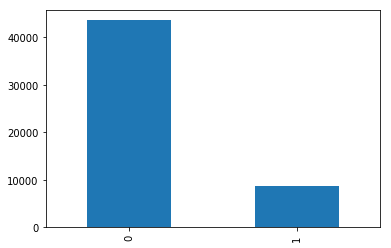

In [23]:
train['Claim'].value_counts().plot(kind='bar')

In [41]:
train['Claim'].value_counts(normalize=True)*100

0    83.330147
1    16.669853
Name: Claim, dtype: float64

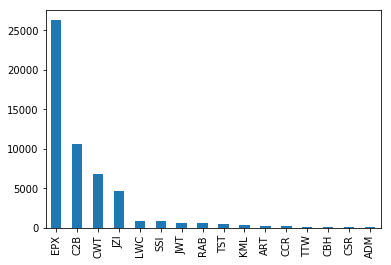

In [11]:
train['Agency'].value_counts().plot(kind='bar')

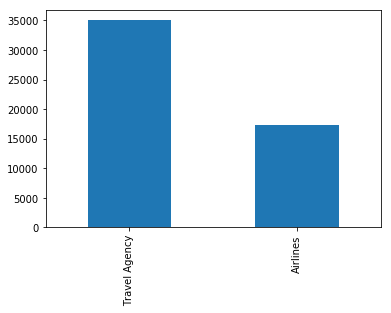

In [12]:
train['Agency Type'].value_counts().plot(kind='bar')

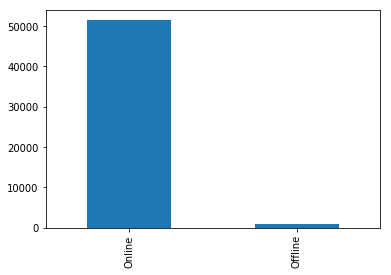

In [13]:
train['Distribution Channel'].value_counts().plot(kind='bar')

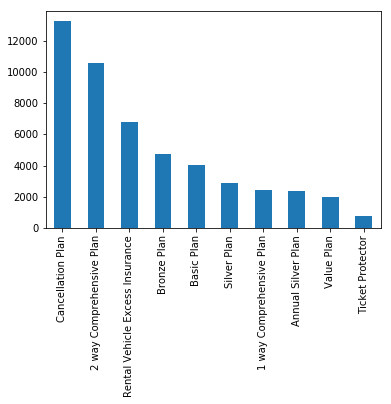

In [15]:
train['Product Name'].value_counts().head(10).plot(kind='bar')

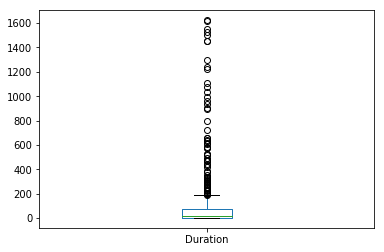

In [23]:
train['Duration'].value_counts().plot(kind='box')

In [ ]:
train['Duration'].describe()

In [106]:
Q1 = train['Duration'].quantile(0.25)
Q3 = train['Duration'].quantile(0.75)
IQR = Q3 - Q1
IQR

47.0

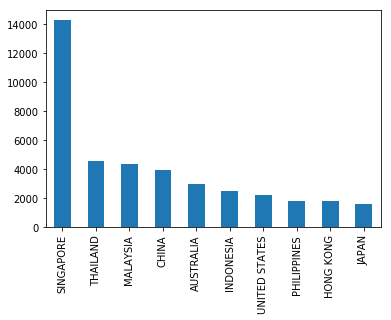

In [18]:
train['Destination'].value_counts().head(10).plot(kind='bar')

People prefer 'Singapore','Thailand' and'Malaysia' more as travel destinations

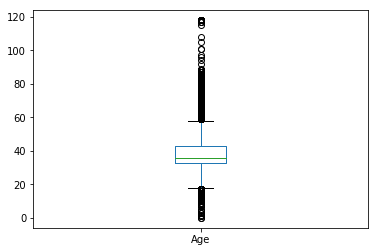

In [21]:
train['Age'].plot(kind='box')

In [24]:
train['Age'].describe()

count    52310.000000
mean        39.555725
std         13.762473
min          0.000000
25%         33.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

In [24]:
train['Commision (in value)'].describe()

count    52310.000000
mean        12.219963
std         22.847645
min          0.000000
25%          0.000000
50%          0.000000
75%         13.380000
max        262.760000
Name: Commision (in value), dtype: float64

In [26]:
train['Net Sales'].describe()

count    52310.000000
mean        48.554673
std         60.198589
min       -389.000000
25%         19.800000
50%         29.500000
75%         55.000000
max        682.000000
Name: Net Sales, dtype: float64

In [10]:
corr=train.corr(method ='pearson')
corr

,ID,Duration,Net Sales,Commision (in value),Age,Claim
ID,1.000000,0.000355,0.004268,0.004822,-0.003083,0.006393
Duration,0.000355,1.000000,0.595261,0.483148,-0.003969,0.201583
Net Sales,0.004268,0.595261,1.000000,0.733110,0.022606,0.326799
Commision (in value),0.004822,0.483148,0.733110,1.000000,0.087455,0.258688
Age,-0.003083,-0.003969,0.022606,0.087455,1.000000,-0.060228
Claim,0.006393,0.201583,0.326799,0.258688,-0.060228,1.000000


In [8]:
corr_columns=corr[abs(corr)>0.5].index
corr_columns

Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

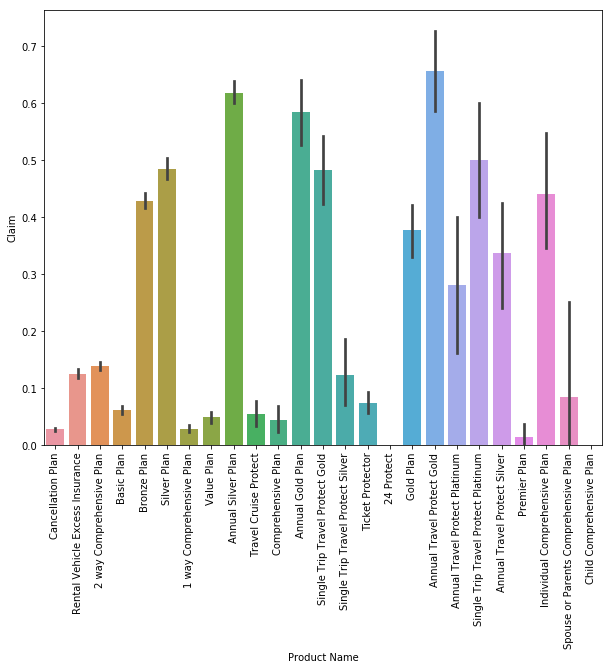

In [45]:
train.groupby('Product Name')['Claim'].value_counts(normalize=True)*100
plt.figure(figsize=(10,8))
p = sns.barplot(data=train,x = 'Product Name',y='Claim')
plt.xticks(rotation=90)

Products 'Annual Gold Plan','Annual Travel Protect Gold','Annual Silver Plan' and 'Single Trip Travel Protect Platinum' have Higher claim Percentage

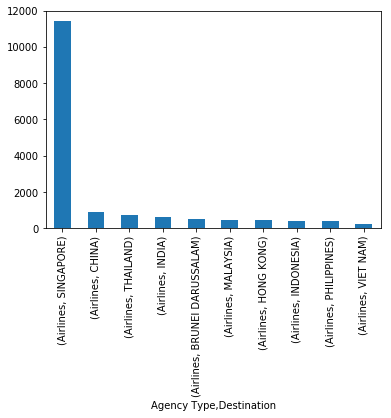

In [38]:
train.groupby('Agency Type')['Destination'].value_counts().head(10).plot(kind='bar')

In [72]:
train.groupby('Agency Type')['Claim'].value_counts(normalize=True)*100

Agency Type    Claim
Airlines       0        68.106734
               1        31.893266
Travel Agency  0        90.861813
               1         9.138187
Name: Claim, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

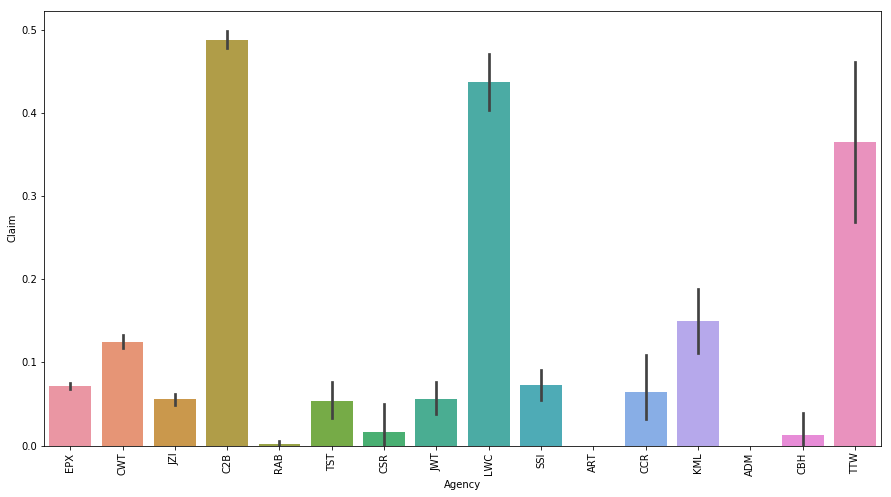

In [42]:
train.groupby('Agency')['Claim'].value_counts()
plt.figure(figsize=(15,8))
p = sns.barplot(data=train,x ='Agency',y='Claim')
plt.xticks(rotation=90)

Agency 'C2B','LWC' and 'TTW' have higher claim percentage

In [22]:
Net_sales_by_agency=train.groupby('Agency')['Net Sales'].mean().reset_index()
Net_sales_by_agency

,Agency,Net Sales
0,ADM,53.928571
1,ART,27.955874
2,C2B,94.265597
3,CBH,26.565789
4,CCR,31.051055
5,CSR,32.383333
6,CWT,46.103047
7,EPX,33.486356
8,JWT,53.939570
9,JZI,31.807839


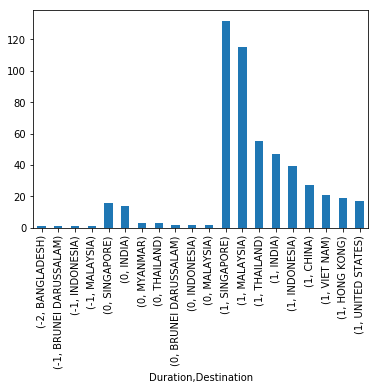

In [96]:
train.groupby('Duration')['Destination'].value_counts().head(20).plot(kind='bar')

In [63]:
table=pd.crosstab(train['Destination'],train['Claim'],margins=True,normalize='index')
table

Claim,0,1
Destination,,
ARGENTINA,0.916667,0.083333
AUSTRALIA,0.848887,0.151113
AUSTRIA,1.000000,0.000000
AZERBAIJAN,1.000000,0.000000
BAHRAIN,1.000000,0.000000
BANGLADESH,1.000000,0.000000
BELARUS,1.000000,0.000000
BELGIUM,1.000000,0.000000
BERMUDA,1.000000,0.000000


In [65]:
table = table.sort_values(by=[1], ascending=[False])
table

Claim,0,1
Destination,,
SINGAPORE,0.627440,0.372560
SOUTH AFRICA,0.666667,0.333333
NEPAL,0.679688,0.320312
COSTA RICA,0.750000,0.250000
UNITED STATES,0.797814,0.202186
ITALY,0.818627,0.181373
NETHERLANDS,0.821782,0.178218
TURKEY,0.822581,0.177419
All,0.833301,0.166699


Destination wise 'Singapore','South Africa' and 'Nepal' countries have higher claim percentage

In [39]:
train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn import svm
from sklearn.svm import LinearSVC

X=train.iloc[:,:-1]
y=train.iloc[:,-1]
Y_test=test.iloc[:,0:10]
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
Z = Y_test.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
Z.fillna(0,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)
Z.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')

In [6]:
# Predicting target variable 'Claim' for Test Dataset using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(Z)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
clf = RandomForestClassifier(n_estimators=100, max_depth=100,min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
y_pred1=clf.predict(Z)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
xgb_clf = XGBClassifier(base_estimator=clf1,random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred2=xgb_clf.predict(Z)

In [53]:
from sklearn.tree import DecisionTreeClassifier
clf1 =DecisionTreeClassifier(max_depth=1,random_state=0)
clf1.fit(X_train,y_train)
y_pred3=clf1.predict(Z)

In [54]:
# Creating Dataframe
dataframe = pd.DataFrame(y_pred3,columns=['Claim'])
dataframe.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [55]:
# Creating CSV file from Dataframe
dataframe.to_csv (r'E:\DATA SCIENCE\GREYATOM\HACKATHON\Sample_submission_final.csv', index = False, header=True)
# Read dataframe
df=pd.read_csv(r'E:\DATA SCIENCE\GREYATOM\HACKATHON\Sample_submission_final.csv')
df.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [56]:
df['Claim'].value_counts()

0    20965
1     1456
Name: Claim, dtype: int64

In [28]:
columns=test.columns
columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fr=le.fit_transform(train['Agency'])
fr

array([7, 7, 6, ..., 2, 7, 2])

In [10]:
# Using Logistic Regression to calculate Precision Score
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
precision=precision_score(y_test,y_pred,average='micro')
('Precision Score of Logistic Regression is:',precision)

('Precision Score of Logistic Regression is:', 0.8462371758108711)

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from imblearn.over_sampling import SMOTE 
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 6161
Before OverSampling, counts of label '0': 30456 

After OverSampling, the shape of train_X: (60912, 10)
After OverSampling, the shape of train_y: (60912,) 

After OverSampling, counts of label '1': 30456
After OverSampling, counts of label '0': 30456


In [24]:
from sklearn.metrics import confusion_matrix, classification_report 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     13134
           1       0.33      0.56      0.42      2559

    accuracy                           0.74     15693
   macro avg       0.62      0.67      0.63     15693
weighted avg       0.81      0.74      0.77     15693



In [28]:
# Using RandomForest Classifier to calculate Precision Score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train_res, y_train_res.ravel())
y_pred=clf.predict(X_test)
#precision1=precision_score(y_test,y_pred,average='micro')
#('Precision Score of Random Forest is:',precision1)
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     13134
           1       0.65      0.73      0.69      2559

    accuracy                           0.89     15693
   macro avg       0.80      0.83      0.81     15693
weighted avg       0.90      0.89      0.89     15693



In [17]:
from sklearn.ensemble import VotingClassifier

#Different models initialised
log_clf_1 = LogisticRegression(random_state=0)
log_clf_2 = LogisticRegression(random_state=42)
decision_clf1 = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
decision_clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state=42)


#Creation of list of models
Model_List=[('Logistic Regression 1', log_clf_1),
            ('Logistic Regression 2', log_clf_2),
            ('Decision Tree 1', decision_clf1),
            ('Decision Tree 2', decision_clf2)]


voting_clf_soft = VotingClassifier(estimators = Model_List,voting = 'soft')

voting_clf_soft.fit(X_train,y_train)

y_pred=voting_clf_soft.predict(X_test)
precision=precision_score(y_test,y_pred,average='micro')
("precision score of ensemble learning using soft voting classifier is :",precision)

('precision score of ensemble learning using soft voting classifier is :',
 0.8978525457210221)

In [42]:
## Using DecisionTree Classifier to calculate Precision Score
from sklearn.tree import DecisionTreeClassifier
clf1 =DecisionTreeClassifier(max_depth=1,random_state=0)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
Precision=precision_score(y_test,y_pred,average='micro')
('Precision Score of Decision Tree is:',precision)

('Precision Score of Decision Tree is:', 0.8978525457210221)

In [92]:
## Using SVM Classifier to calculate Precision Score
# Initiating support vector object
model= svm.LinearSVC(random_state=0)
#Fitting the model
model.fit(X_train, y_train) 
y_pred=model.predict(X_test)
Precision=precision_score(y_test,y_pred,average='micro')
("Precision score of Support Vector is: ",Precision)

C:\Users\MANVA\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


('Precision score of Support Vector is: ', 0.8401197986363347)

In [ ]:
from sklearn.ensemble import VotingClassifier

#Different models initialised
log_clf_1 = LogisticRegression(random_state=0)


In [109]:
!pip install xgboost

In [43]:
### Using XGBOOSTClassifier to calculate Precision Score
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(base_estimator=clf1,random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred=xgb_clf.predict(X_test)
xgb_score= precision_score(y_test,y_pred,average='micro')
print("Precision Score of XGBoosting: ",Precision)

Precision Score of XGBoosting:  0.8466832345631811


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(base_estimator=clf1,random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred=xgb_clf.predict(X_test)
xgb_score= precision_score(y_test,y_pred,average='micro')
# Code starts here
cf=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f_score=f1_score(y_test,y_pred)

("confusion Matrix : ", cf)


('confusion Matrix : ', array([[12723,   411],
        [  837,  1722]], dtype=int64))

In [96]:
("confusion Matrix Accuracy : ", acc)

('confusion Matrix Accuracy : ', 0.9204740967310265)

In [97]:
("confusion Matrix Precision : ", precision)

('confusion Matrix Precision : ', 0.8073136427566807)

In [98]:
("confusion Matrix recall : ", recall)

('confusion Matrix recall : ', 0.6729191090269636)

In [99]:
("confusion Matrix f1_score: ", f_score)

('confusion Matrix f1_score: ', 0.7340153452685423)